In [1]:
import pandas as pd
import numpy as np
emicron_original = pd.read_csv('../../../Outputs/emicron_natives.csv')  # Include the subdirectory in the file path

In [11]:
emicron = emicron_original.copy()

**creating clusters**

In [12]:
#REMOVING NON-NUMERIC COLUMNS, SCALING
from sklearn.preprocessing import StandardScaler

# Filter columns based on data types
numeric_columns = emicron.select_dtypes(include=['int64', 'float64'])

# Create a new DataFrame with only numeric columns
emicron = emicron[numeric_columns.columns]

# Now you can scale the data
scaler = StandardScaler()
X = scaler.fit_transform(emicron)

In [13]:
#RUNNING K-MEANS
from sklearn.cluster import KMeans
# There appears to be an elbow around a value of 7. We can refit a model with this value and see what the groups look like
kmeans_elbow = KMeans(n_clusters=7, n_init=20, random_state=0)

# Fitting and predicting in one line
y_pred_elbow = kmeans_elbow.fit_predict(X)

# Storing the predictions in a dataframe to work with
kmeans_pred_elbow = pd.DataFrame(
    {'cluster': y_pred_elbow},
    index=emicron.index
)

In [14]:
#ADDING CLUSTER COLUMN TO EMICRON
emicron = emicron_original.copy()
emicron['cluster'] = kmeans_pred_elbow['cluster']

**identifying clusters to analyse**

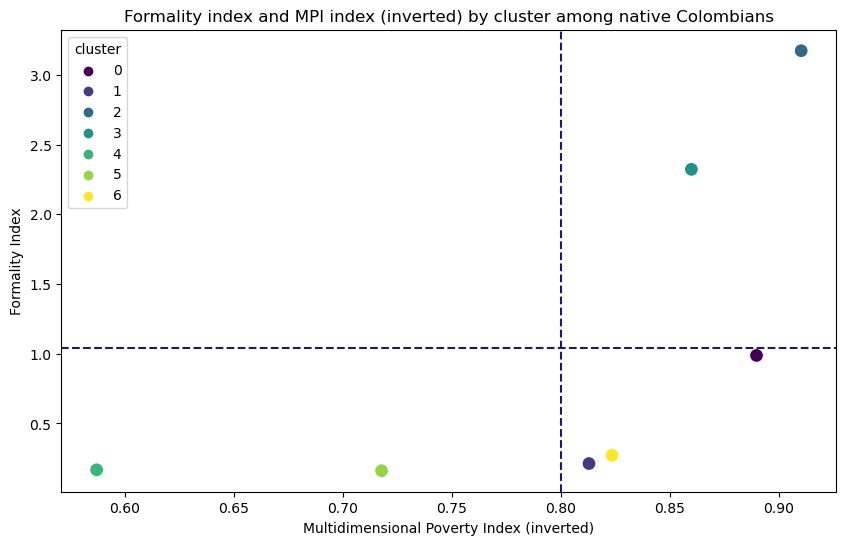

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

emicron['mpi_index_rev'] = 1-emicron['mpi_index']

# Assuming 'emicron' is your DataFrame and it has been defined already
mean_values = emicron.groupby('cluster')[['II', 'mpi_index_rev']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_values, x='mpi_index_rev', y='II', hue='cluster', palette='viridis', s=100)

# Add a vertical line at the middle of x-axis
plt.axvline(mean_values['mpi_index_rev'].mean(), color='#191970', linestyle='--')

# Add a horizontal line at the middle of y-axis
plt.axhline(mean_values['II'].mean(), color='#191970', linestyle='--')

plt.title('Formality index and MPI index (inverted) by cluster among native Colombians')
plt.xlabel('Multidimensional Poverty Index (inverted)')
plt.ylabel('Formality Index')


# Save the plot as an image
plt.savefig('../../../Plots/informality_mpi_plot_natives.png', dpi=300)

plt.show()

Cluster 1 and 6 are just above the mpi line

**analysis natives**

*formality index*

In [16]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['II'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of II by cluster:")
print(weighted_avg_by_cluster)

Weighted average of II by cluster:
cluster
0    0.884057
1    0.230366
2    3.204703
3    2.318126
4    0.157583
5    0.136492
6    0.271506
dtype: float64


Dimension 1 - Registration (RUT and Cam. Comercio), no Nan to handle

Dimension 2 - Healthcare and Pensions (H, P and ARL for owner and workers, if any)

Dimension 3 - Taxes (Renta, IVA, ICA. If eligible, i.e., RUT != Simplificado)

Dimension 4 - Accounting (Formal), no Nan to handle

*II_Dx*

In [17]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['II_D1'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of II_D1 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of II_D1 by cluster:
cluster
0    0.211999
1    0.038569
2    0.893962
3    0.747540
4    0.027447
5    0.021971
6    0.031472
dtype: float64


In [18]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['II_D2'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of II_D2 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of II_D2 by cluster:
cluster
0    0.135072
1    0.029848
2    0.600072
3    0.226486
4    0.006620
5    0.003104
6    0.012886
dtype: float64


In [19]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['II_D3'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of II_D3 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of II_D3 by cluster:
cluster
0    0.251606
1    0.060451
2    0.877508
3    0.832569
4    0.039610
5    0.033003
6    0.045782
dtype: float64


In [20]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['II_D4'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of II_D4 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of II_D4 by cluster:
cluster
0    0.285380
1    0.101498
2    0.833162
3    0.511530
4    0.083906
5    0.078413
6    0.181366
dtype: float64


*3069: how many employees*
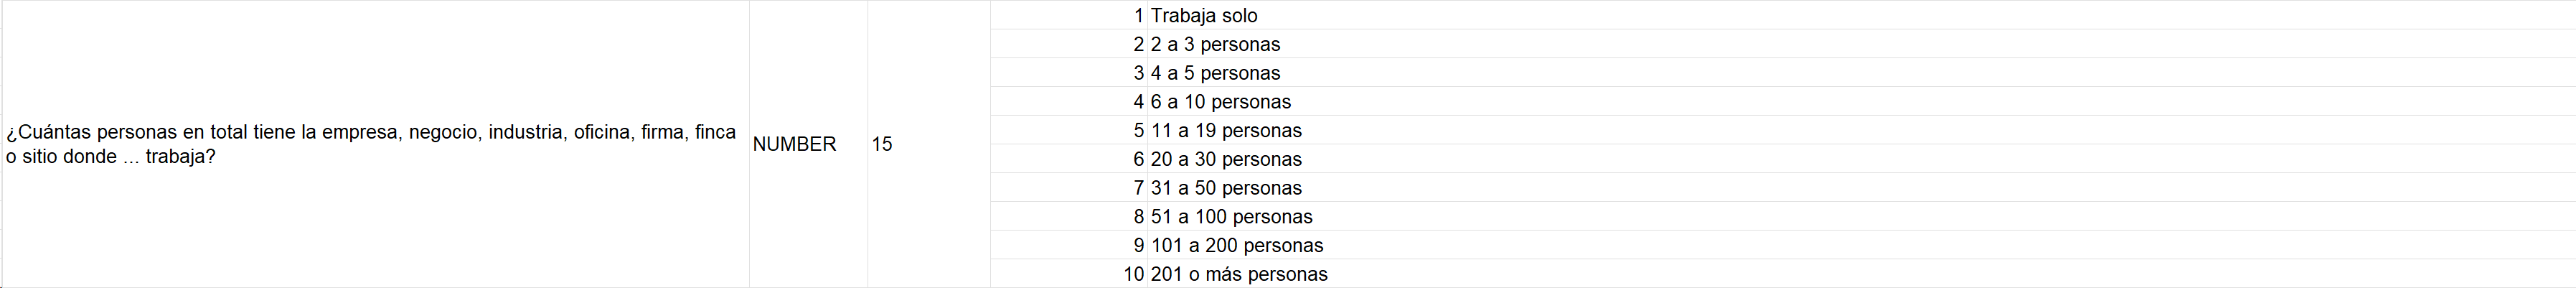

In [21]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P3069'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P3069 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P3069 by cluster:
cluster
0    6.798445
1    1.167284
2    2.447333
3    1.480518
4    1.141027
5    1.350854
6    1.130498
dtype: float64


In [22]:
# Group by the values in P3069 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron.groupby(['P3069', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3069', 'cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

    P3069  cluster  Weighted Distribution
0     1.0        0           1.365770e-04
1     1.0        1           1.896088e-01
2     1.0        2           5.770522e-03
3     1.0        3           1.031533e-01
4     1.0        4           1.049749e-01
5     1.0        5           1.634306e-01
6     1.0        6           1.930882e-01
7     2.0        0           2.115459e-03
8     2.0        1           2.675809e-02
9     2.0        2           1.156612e-02
10    2.0        3           4.778222e-02
11    2.0        4           1.357709e-02
12    2.0        5           5.480862e-02
13    2.0        6           2.352793e-02
14    3.0        0           1.321067e-03
15    3.0        1           3.469486e-03
16    3.0        2           6.537856e-03
17    3.0        3           1.122007e-02
18    3.0        4           1.153912e-03
19    3.0        5           7.813847e-03
20    3.0        6           1.825860e-03
21    4.0        0           1.776153e-03
22    4.0        1           1.076

*P6430*

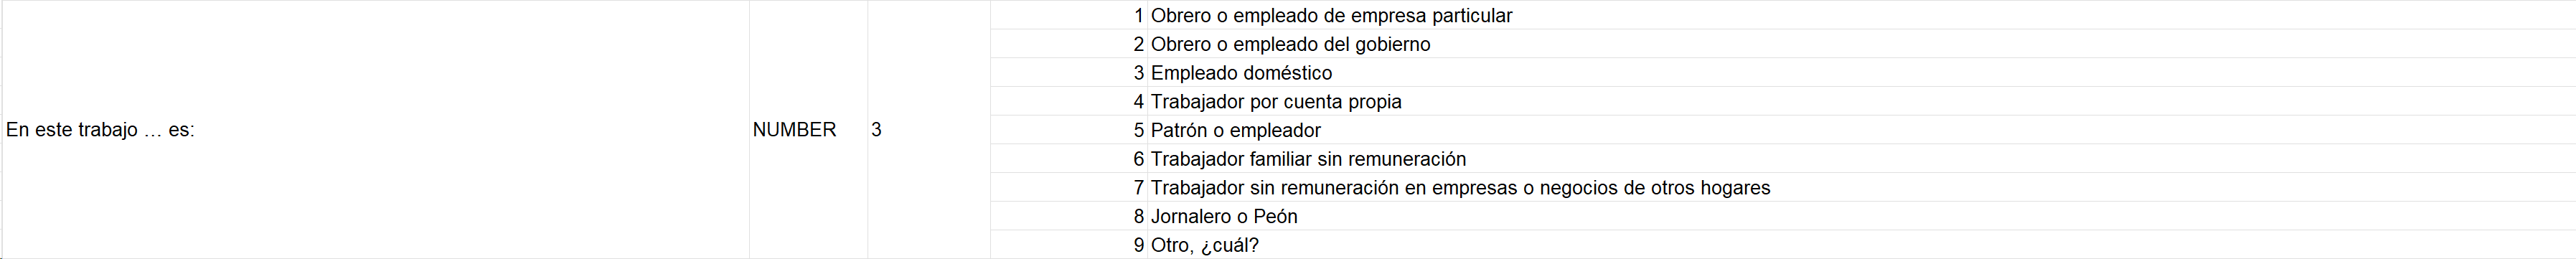

In [23]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P6430'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P6430 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P6430 by cluster:
cluster
0    1.472741
1    4.050910
2    4.680480
3    4.245214
4    4.024794
5    4.128874
6    4.024255
dtype: float64


In [24]:
# Group by the values in P3069 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron.groupby(['P3069', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3069', 'cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

    P3069  cluster  Weighted Distribution
0     1.0        0           1.365770e-04
1     1.0        1           1.896088e-01
2     1.0        2           5.770522e-03
3     1.0        3           1.031533e-01
4     1.0        4           1.049749e-01
5     1.0        5           1.634306e-01
6     1.0        6           1.930882e-01
7     2.0        0           2.115459e-03
8     2.0        1           2.675809e-02
9     2.0        2           1.156612e-02
10    2.0        3           4.778222e-02
11    2.0        4           1.357709e-02
12    2.0        5           5.480862e-02
13    2.0        6           2.352793e-02
14    3.0        0           1.321067e-03
15    3.0        1           3.469486e-03
16    3.0        2           6.537856e-03
17    3.0        3           1.122007e-02
18    3.0        4           1.153912e-03
19    3.0        5           7.813847e-03
20    3.0        6           1.825860e-03
21    4.0        0           1.776153e-03
22    4.0        1           1.076

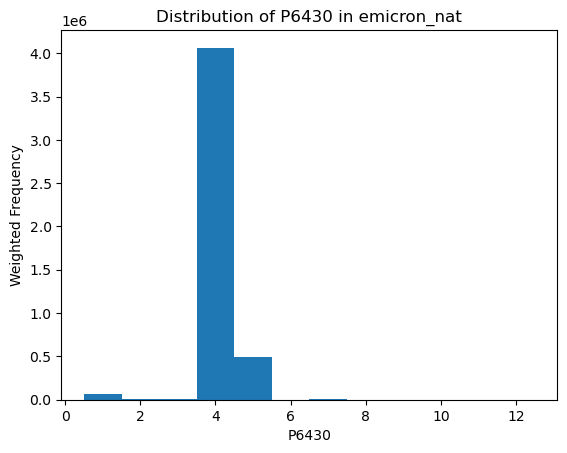

In [394]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['P6430'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P6430')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P6430 in emicron_nat')

# Show the plot
plt.show()

*7040:*
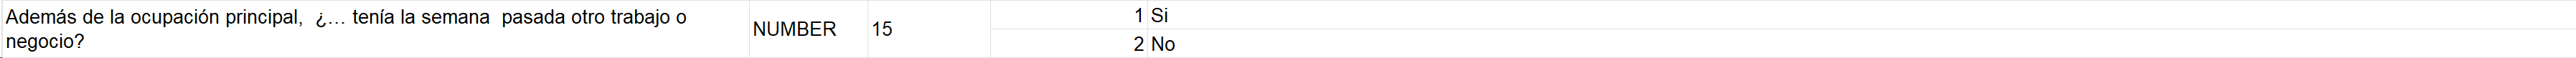

In [25]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P7040'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P7040 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P7040 by cluster:
cluster
0    1.003762
1    1.970151
2    1.952728
3    1.963053
4    1.950949
5    1.817322
6    1.919361
dtype: float64


*6440: 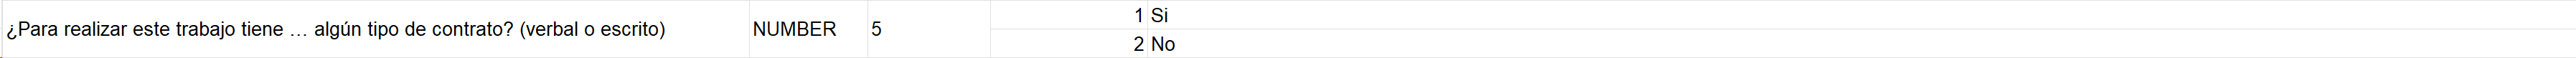*

In [26]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P6440'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P6440 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P6440 by cluster:
cluster
0    1.002445
1    1.972999
2    1.888110
3    1.966105
4    1.982255
5    1.981996
6    1.977315
dtype: float64


*monthly compensation of all workers*

In [27]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['REMUNERACION_TOTAL'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of REMUNERACION_TOTAL by cluster:")
print(weighted_avg_by_cluster)

Weighted average of REMUNERACION_TOTAL by cluster:
cluster
0    2.144411e+05
1    6.661037e+04
2    4.075671e+06
3    4.262095e+05
4    3.553082e+04
5    1.463965e+05
6    2.692141e+04
dtype: float64


*registered in Chamber of Commerce?*

In [28]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P1055'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P1055 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P1055 by cluster:
cluster
0    1.888690
1    1.998915
2    1.180042
3    1.461979
4    1.993069
5    1.999168
6    1.997689
dtype: float64


*Sales last month*

In [131]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['VENTAS_MES_ANTERIOR'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of VENTAS_MES_ANTERIOR by cluster:")
print(weighted_avg_by_cluster)

Weighted average of VENTAS_MES_ANTERIOR by cluster:
cluster
0    1863062.08
1    2060219.22
2   22090852.94
3    4697338.84
4    1381842.69
5    1280176.55
6    1220095.17
dtype: float64


*P3017_B: costs of electricity*

In [30]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P3017_B'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P3017_B by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P3017_B by cluster:
cluster
0     26346.357107
1     11377.378175
2    294903.351977
3     82622.118212
4      8123.531489
5      7734.955365
6     14877.677684
dtype: float64


*P3017_G: costs of transport*

In [32]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P3017_G'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P3017_G by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P3017_G by cluster:
cluster
0     42348.000366
1     39864.567503
2    569824.029668
3     78538.320744
4     33385.699864
5     38877.637827
6     27557.335950
dtype: float64


*P3010: if the business is part of Veeduria ciudadana*

In [33]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P3010'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P3010 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P3010 by cluster:
cluster
0    2.000000
1    2.000000
2    2.000000
3    1.999550
4    2.000000
5    1.999647
6    2.000000
dtype: float64


*P3012: if the business is part of an environmental group*

In [34]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P3012'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P3012 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P3012 by cluster:
cluster
0    1.997980
1    1.999969
2    1.996913
3    1.999588
4    1.999852
5    1.999660
6    1.999866
dtype: float64


*Registered at RUT*

In [35]:
# Group by the 'cluster' column
grouped = emicron.groupby('cluster')

# Calculate the weighted average for each group
weighted_avg_by_cluster = grouped.apply(lambda x: (x['P1633'] * x['F_EXP']).sum() / x['F_EXP'].sum())

# Print the weighted average values by cluster
print("Weighted average of P1633 by cluster:")
print(weighted_avg_by_cluster)

Weighted average of P1633 by cluster:
cluster
0    1.687312
1    1.923947
2    1.032034
3    1.042940
4    1.952037
5    1.956890
6    1.939367
dtype: float64


In [397]:
# Filter rows where P1633 is 2
filtered_rows = emicron_nat[emicron_nat['P1633'] == 2]

# Calculate the weighted sum of the filtered rows
weighted_sum_filtered = (filtered_rows['F_EXP']).sum()

# Calculate the total weighted sum
total_weighted_sum = emicron_nat['F_EXP'].sum()

# Calculate the share
share_of_rows = weighted_sum_filtered / total_weighted_sum

print("Share of rows where value of P1633 is 2:", share_of_rows)

Share of rows where value of P1633 is 2: 0.7625781864572875


*What financial register is used. val 3 and 5 would be informal*

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.hist(emicron_nat['P640'], weights=emicron_nat['F_EXP'], bins=range(1, 14), align='left')

# Add labels and title
plt.xlabel('P640')
plt.ylabel('Weighted Frequency')
plt.title('Distribution of P640 in emicron_nat')

# Show the plot
plt.show()

In [38]:
# Group by the values in P640 and cluster, then calculate the weighted sum for each group
weighted_distribution = emicron.groupby(['P640', 'cluster'])['F_EXP'].sum()

# Normalize the weights within each cluster to get the distribution
weighted_distribution = weighted_distribution.groupby(level=1).apply(lambda x: x / x.sum())

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P640', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

    P640  Cluster  Weighted Distribution
0      1        0               0.038382
1      1        1               0.000569
2      1        2               0.463248
3      1        3               0.068921
4      1        4               0.000169
5      1        5               0.000443
6      1        6               0.000213
7      2        0               0.020306
8      2        1               0.001180
9      2        2               0.213455
10     2        3               0.141977
11     2        4               0.002401
12     2        5               0.002074
13     2        6               0.002321
14     3        0               0.447040
15     3        1               0.199211
16     3        2               0.265204
17     3        3               0.588596
18     3        4               0.162362
19     3        5               0.151035
20     3        6               0.356632
21     4        0               0.003172
22     4        1               0.000143
23     4        

C:\Users\angel\AppData\Local\Temp\ipykernel_14196\3168544169.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  weighted_distribution = weighted_distribution.groupby(level=1).apply(lambda x: x / x.sum())


*how many people work in the business*

In [39]:
# Group by the cluster column and calculate the weighted average of P3091 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3091'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3091']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3091
0        0                   1.312663
1        1                   1.131070
2        2                   3.727308
3        3                   1.551964
4        4                   1.138883
5        5                   1.480057
6        6                   1.124118


*whether you are a business owner (1) or a freelancer (2)*

In [40]:
# Group by the cluster column and calculate the weighted average of P3033 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3033'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3033']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3033
0        0                   1.880872
1        1                   1.949474
2        2                   1.127220
3        3                   1.766797
4        4                   1.962452
5        5                   1.850711
6        6                   1.971173


*average monthly consumption*

In [42]:
# Group by the cluster column and calculate the weighted average of CONSUMO_INTERMEDIO within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['CONSUMO_INTERMEDIO'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of CONSUMO_INTERMEDIO']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of CONSUMO_INTERMEDIO
0        0                            9.676514e+05
1        1                            1.122104e+06
2        2                            1.694382e+07
3        3                            3.101181e+06
4        4                            7.599222e+05
5        5                            6.574190e+05
6        6                            7.191480e+05


*does the business have a commercial name? 1 yes 2 no*

In [43]:
# Group by the cluster column and calculate the weighted average of P3035 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3035'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3035']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3035
0        0                   1.822339
1        1                   1.952756
2        2                   1.221934
3        3                   1.479877
4        4                   1.953962
5        5                   1.898796
6        6                   1.896998


*social benefits paid per month*

In [157]:
# Group by the cluster column and calculate the weighted average of PRESTACIONES within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['PRESTACIONES'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of PRESTACIONES']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of PRESTACIONES
0        0                       87121.75982
1        1                       14461.16932
2        2                     1293569.77060
3        3                      119017.95743
4        4                        3516.77538
5        5                        3451.19743
6        6                        7383.51382


*if anyone helps in the business*

In [46]:
# Group by the cluster column and calculate the weighted average of P3031 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3031'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3031']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3031
0        0                   1.764009
1        1                   1.894007
2        2                   1.074704
3        3                   1.629470
4        4                   1.886613
5        5                   1.701297
6        6                   1.892176


*does the business use technological devices?*

In [47]:
# Group by the cluster column and calculate the weighted average of P4001 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P4001'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P4001']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P4001
0        0                   1.716230
1        1                   1.974432
2        2                   1.270611
3        3                   1.640551
4        4                   1.989324
5        5                   1.997581
6        6                   1.919849


*COSTOS_MES_ANTERIOR*

In [132]:
# Group by the cluster column and calculate the weighted average of COSTOS_MES_ANTERIOR within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['COSTOS_MES_ANTERIOR'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of COSTOS_MES_ANTERIOR']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of COSTOS_MES_ANTERIOR
0        0                                714706.71
1        1                                796630.46
2        2                              13432774.35
3        3                               2381322.82
4        4                                584120.80
5        5                                523759.04
6        6                                594496.91


*have paid ARL?*

In [50]:
# Group by the cluster column and calculate the weighted average of P3090 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3090'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3090']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3090
0        0                   1.868918
1        1                   1.970976
2        2                   1.360498
3        3                   1.797914
4        4                   1.993110
5        5                   1.998035
6        6                   1.991427


*does the business have internet?*

In [51]:
# Group by the cluster column and calculate the weighted average of P2524 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P2524'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P2524']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P2524
0        0                   1.362489
1        1                   1.601920
2        2                   1.120931
3        3                   1.251489
4        4                   1.773939
5        5                   1.915340
6        6                   1.494747


*average monthly sales*

In [139]:
# Group by the cluster column and calculate the weighted average of P3072 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3072'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3072']

# Set the display format for floating-point numbers to avoid scientific notation
pd.options.display.float_format = '{:.5f}'.format

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3072
0        0               866487.81666
1        1               838492.81969
2        2              3641147.69602
3        3              1364128.65989
4        4               578480.63098
5        5               500083.44776
6        6               475850.91525


*average monthly costs*

In [133]:
# Group by the cluster column and calculate the weighted average of GASTOS_MES within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['GASTOS_MES'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of GASTOS_MES']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of GASTOS_MES
0        0                       250846.58
1        1                       325050.70
2        2                      3481759.96
3        3                       714338.39
4        4                       175689.14
5        5                       132798.43
6        6                       124493.63


*do you have email?*

In [54]:
# Group by the cluster column and calculate the weighted average of P3000 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3000'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3000']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3000
0        0                   1.783528
1        1                   1.946567
2        2                   1.503691
3        3                   1.713586
4        4                   1.968873
5        5                   1.980020
6        6                   1.906518


*social network?*

In [55]:
# Group by the cluster column and calculate the weighted average of P1559 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P1559'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P1559']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P1559
0        0                   1.763578
1        1                   1.950219
2        2                   1.570117
3        3                   1.760572
4        4                   1.962597
5        5                   1.993966
6        6                   1.831979


*do you have a telephone*

In [56]:
# Group by the cluster column and calculate the weighted average of P976 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P976'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P976']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P976
0        0                  1.192833
1        1                  1.279749
2        2                  1.033803
3        3                  1.086890
4        4                  1.518989
5        5                  1.585292
6        6                  1.300337


*do you pay SENA or ICBF*

In [57]:
# Group by the cluster column and calculate the weighted average of P2989 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P2989'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P2989']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P2989
0        0                   1.924328
1        1                   1.996553
2        2                   1.615574
3        3                   1.945374
4        4                   1.998796
5        5                   1.999153
6        6                   1.995777


*did you pay healthcare or pension last month?*

In [58]:
# Group by the cluster column and calculate the weighted average of P3088 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3088'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3088']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3088
0        0                   1.856183
1        1                   2.004343
2        2                   1.308217
3        3                   1.813894
4        4                   2.001450
5        5                   2.007287
6        6                   2.006241


*added value monthly*

In [59]:
# Group by the cluster column and calculate the weighted average of VALOR_AGREGADO within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['VALOR_AGREGADO'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of VALOR_AGREGADO']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of VALOR_AGREGADO
0        0                        8.954107e+05
1        1                        9.381155e+05
2        2                        5.147034e+06
3        3                        1.596157e+06
4        4                        6.219205e+05
5        5                        6.227575e+05
6        6                        5.009472e+05


*which industrial category? 12*
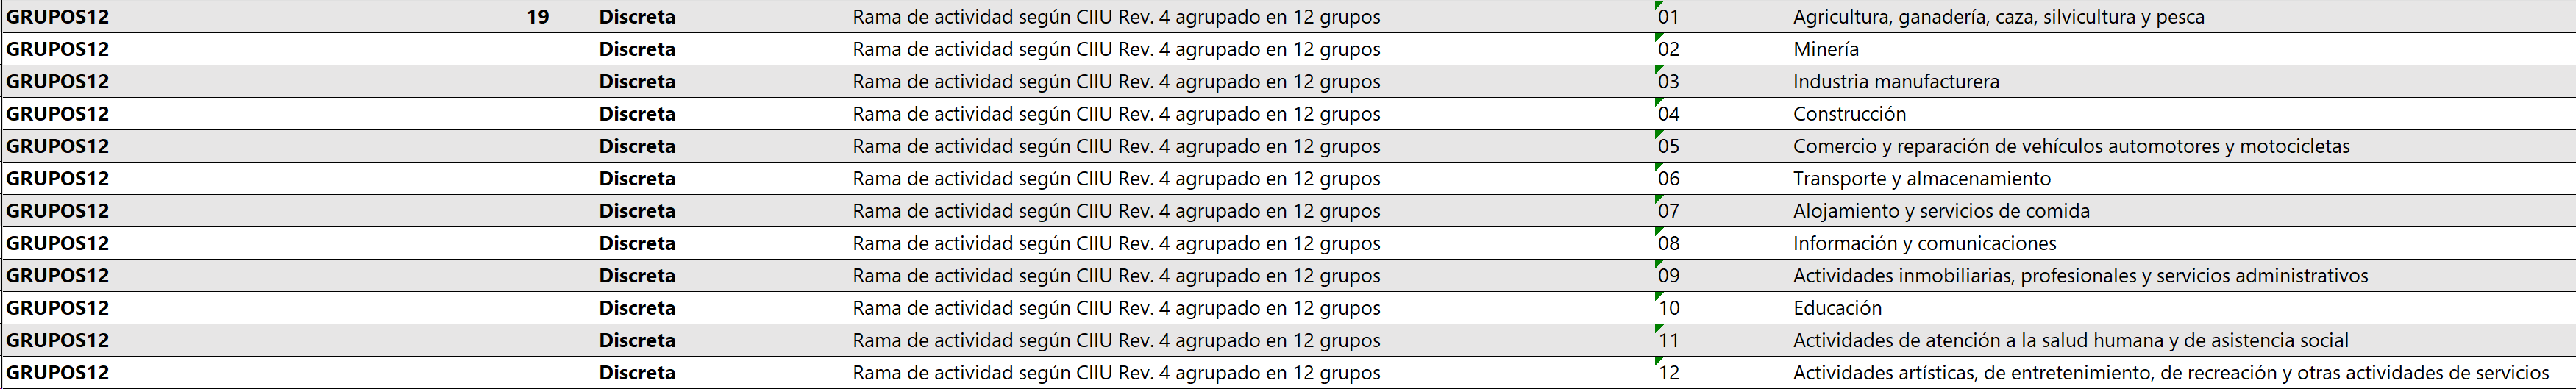

In [61]:
# Group by the values in GRUPOS12 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron.groupby(['GRUPOS12', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['GRUPOS12', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

    GRUPOS12  Cluster  Weighted Distribution
0          1        0               0.002456
1          1        1               0.003463
2          1        2               0.001725
3          1        3               0.003662
4          1        4               0.011842
..       ...      ...                    ...
82        13        1               0.000092
83        13        2               0.000011
84        13        3               0.000028
85        13        4               0.000108
86        13        6               0.000042

[87 rows x 3 columns]


*which industrial category? 4*
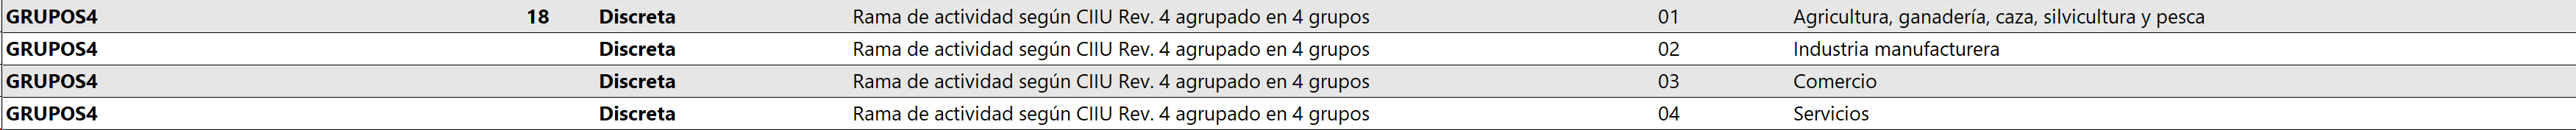

In [140]:
# Group by the values in GRUPOS4 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron.groupby(['GRUPOS4', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['GRUPOS4', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by=['Cluster', 'Weighted Distribution']))

    GRUPOS4  Cluster  Weighted Distribution
7         2        0                0.00115
0         1        0                0.00248
14        3        0                0.00432
21        4        0                0.00822
28        5        1                0.00009
1         1        1                0.00370
8         2        1                0.02008
15        3        1                0.05831
22        4        1                0.13875
29        5        2                0.00001
2         1        2                0.00175
9         2        2                0.00411
16        3        2                0.01078
23        4        2                0.01289
30        5        3                0.00003
3         1        3                0.00373
10        2        3                0.01788
17        3        3                0.06593
24        4        3                0.07758
31        5        4                0.00011
4         1        4                0.01281
11        2        4            

*Municipal Head Offices*

*Populated Centres and Dispersed Rural Areas*

In [66]:
# Group by the values in CLASE_TE and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron.groupby(['CLASE_TE', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['CLASE_TE', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

    CLASE_TE  Cluster  Weighted Distribution
0          1        0               0.013540
1          1        1               0.200506
2          1        2               0.027902
3          1        3               0.154644
4          1        4               0.078151
5          1        5               0.031003
6          1        6               0.182654
7          2        0               0.002618
8          2        1               0.020413
9          2        2               0.001641
10         2        3               0.010504
11         2        4               0.041884
12         2        5               0.198311
13         2        6               0.036230


*urban: if 1 they are in city, if 0 rural area*

In [67]:
# Group by the cluster column and calculate the weighted average of urban within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['urban'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of Urban']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of Urban
0        0                   0.651890
1        1                   0.659145
2        2                   0.611224
3        3                   0.648564
4        4                   0.629600
5        5                   0.647680
6        6                   0.662701


*establishment of business (physical location)*

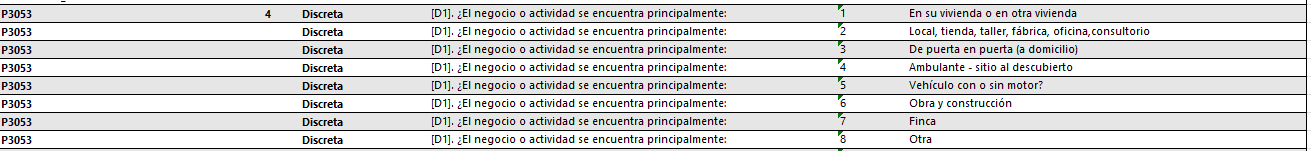

In [156]:
# Group by the values in P3053 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron.groupby(['P3053', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3053', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by=['Cluster', 'Weighted Distribution']))

    P3053  Cluster  Weighted Distribution
49      8        0                0.00021
35      6        0                0.00022
21      4        0                0.00056
28      5        0                0.00124
7       2        0                0.00202
42      7        0                0.00208
14      3        0                0.00404
0       1        0                0.00578
50      8        1                0.00111
43      7        1                0.00220
36      6        1                0.01408
8       2        1                0.02046
1       1        1                0.03052
22      4        1                0.03231
15      3        1                0.05019
29      5        1                0.07005
23      4        2                0.00003
51      8        2                0.00032
37      6        2                0.00062
30      5        2                0.00092
16      3        2                0.00181
44      7        2                0.00212
2       1        2                

*how many months have you been working in this establishment?*

In [70]:
# Group by the cluster column and calculate the weighted average of P3034 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P3034'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P3034']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P3034
0        0                  84.491863
1        1                 136.390286
2        2                 150.832534
3        3                 135.483358
4        4                 113.681253
5        5                 236.668284
6        6                  85.064969


*How much time has this business working?*

In [71]:
# Group by the cluster column and calculate the weighted average of P639 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P639'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P639']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P639
0        0                  3.228022
1        1                  3.811356
2        2                  4.201429
3        3                  3.944768
4        4                  3.546906
5        5                  4.463718
6        6                  3.167325


*age of the owner*

In [72]:
# Group by the cluster column and calculate the weighted average of P241 within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['P241'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P241']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P241
0        0                 39.231344
1        1                 46.321939
2        2                 46.424582
3        3                 46.417746
4        4                 41.706016
5        5                 50.133039
6        6                 44.029682


*geographical location*
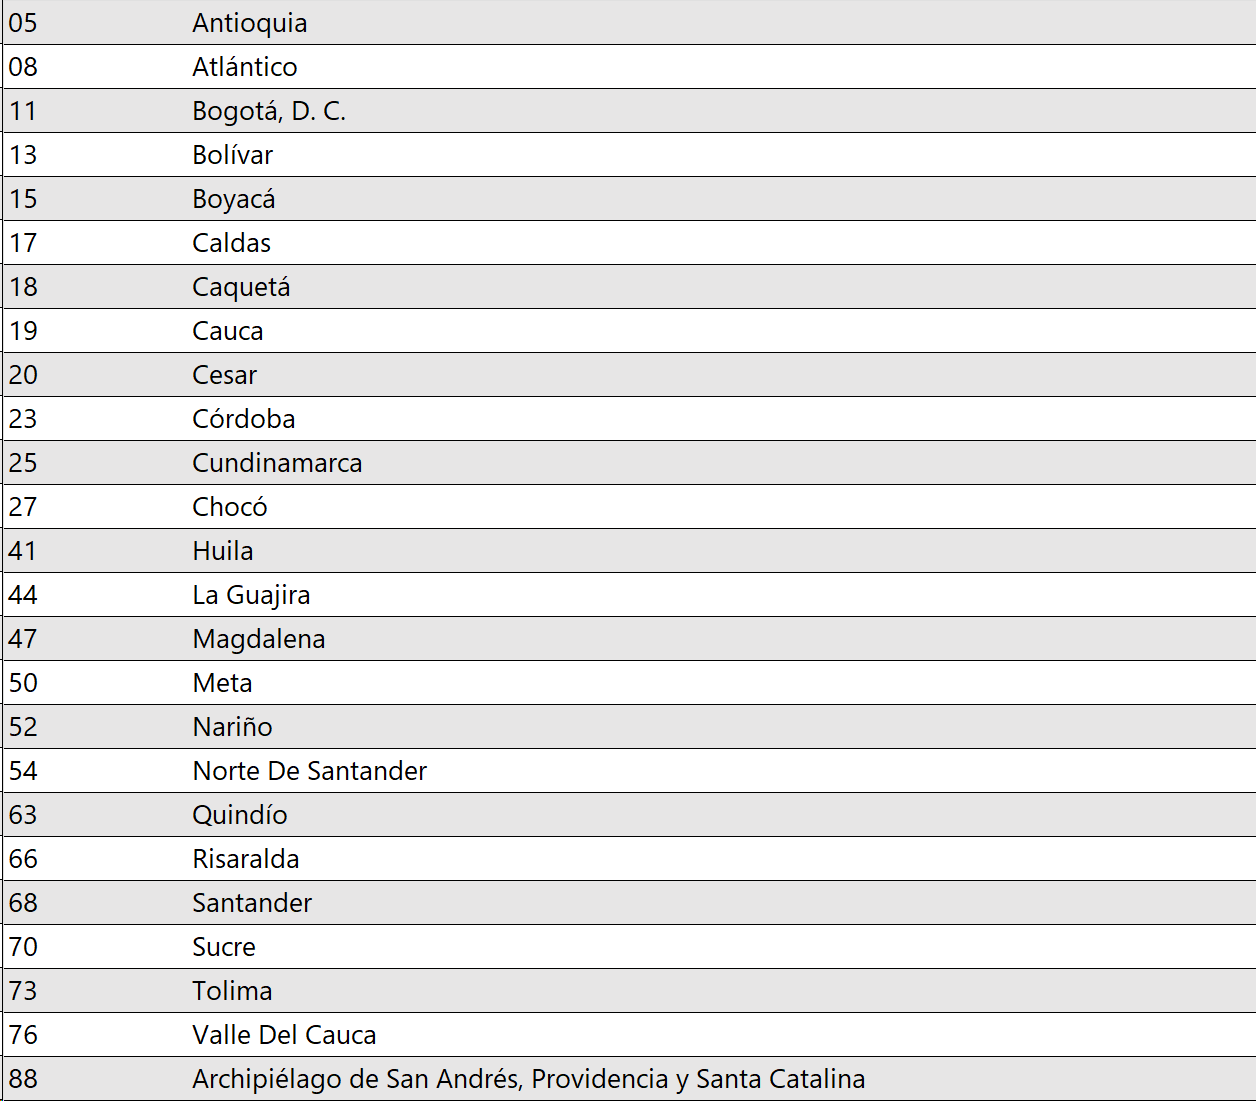

In [74]:
# Group by the values in COD_DEPTO and cluster, and calculate the weighted sum for each group
weighted_freq = emicron.groupby(['COD_DEPTO', 'cluster'])['F_EXP'].sum()

# Print the table
print(weighted_freq)

COD_DEPTO  cluster
5          0           13352.945439
           1          147104.603439
           2           23016.215505
           3          121538.806084
           4           41435.648320
                          ...      
88         2             274.239976
           3             573.781523
           4             236.997882
           5              72.695142
           6             274.737279
Name: F_EXP, Length: 175, dtype: float64


*P3051*
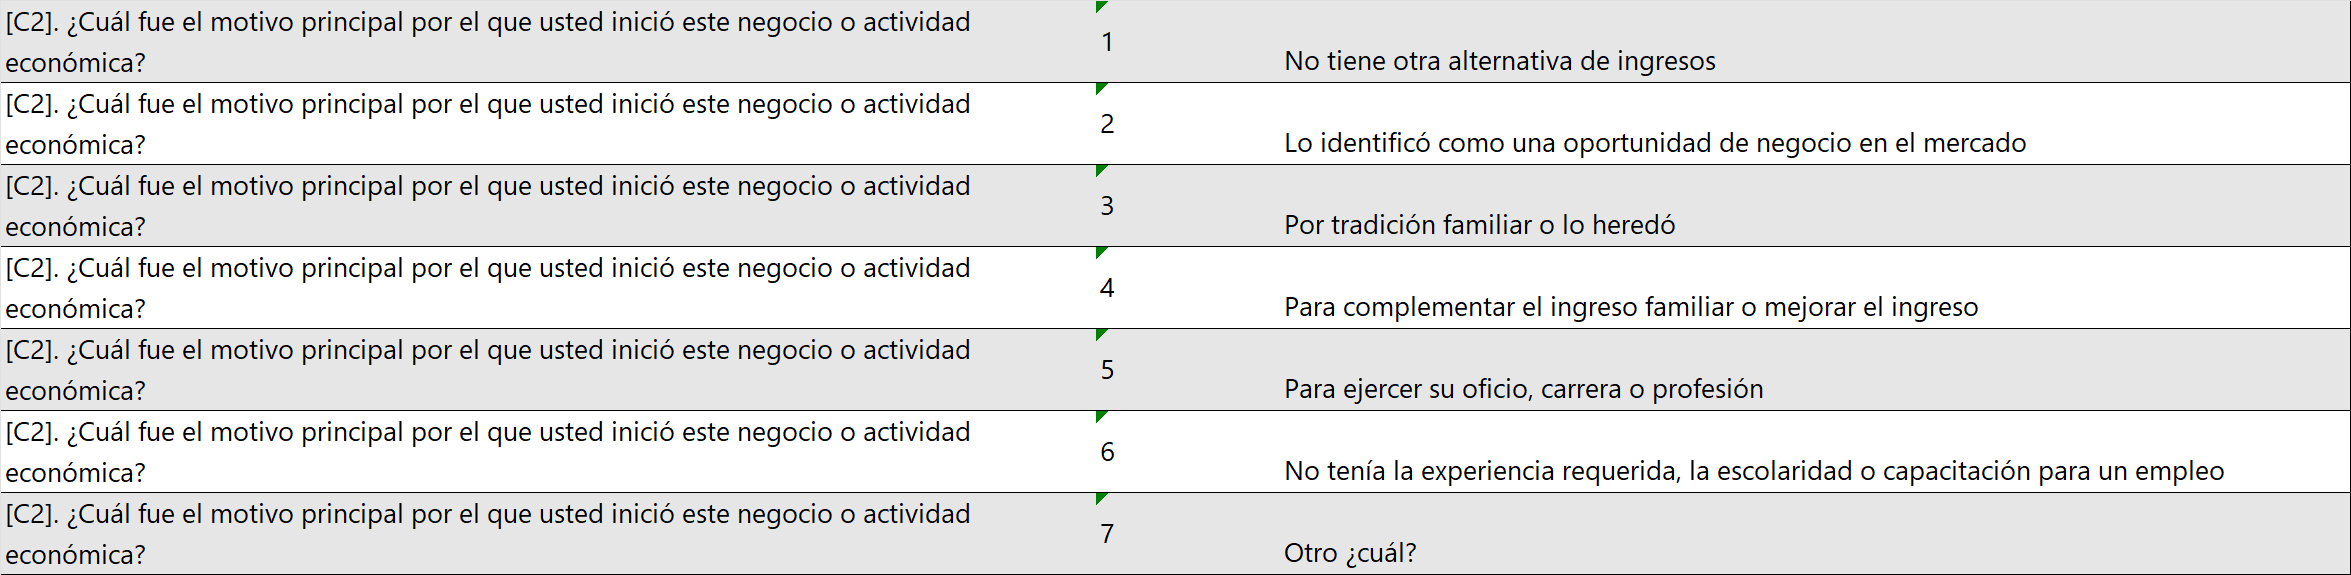

In [75]:
emicron['bad_reason_create_business'] = emicron['P3051'].apply(lambda x: 1 if x in [1, 6] else 0)

In [147]:
# Group by the cluster column and calculate the weighted average of bad_reason_create_business within each cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: (x['bad_reason_create_business'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of bad_reason_create_business']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of bad_reason_create_business
0        0                                         0.24458
1        1                                         0.53777
2        2                                         0.09018
3        3                                         0.18990
4        4                                         0.49335
5        5                                         0.41631
6        6                                         0.34999


*P3374: nationality*
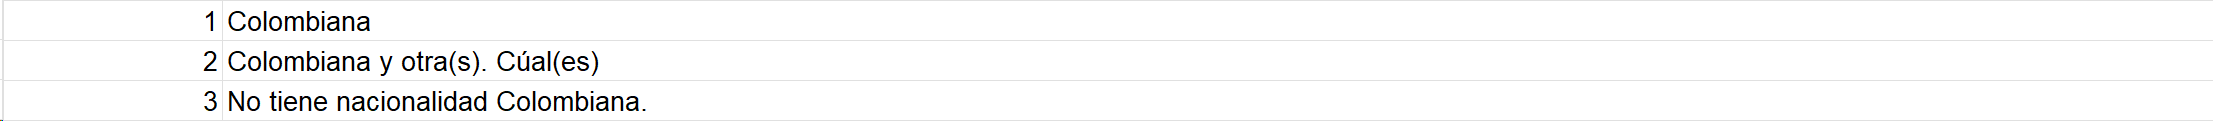

*P3052*
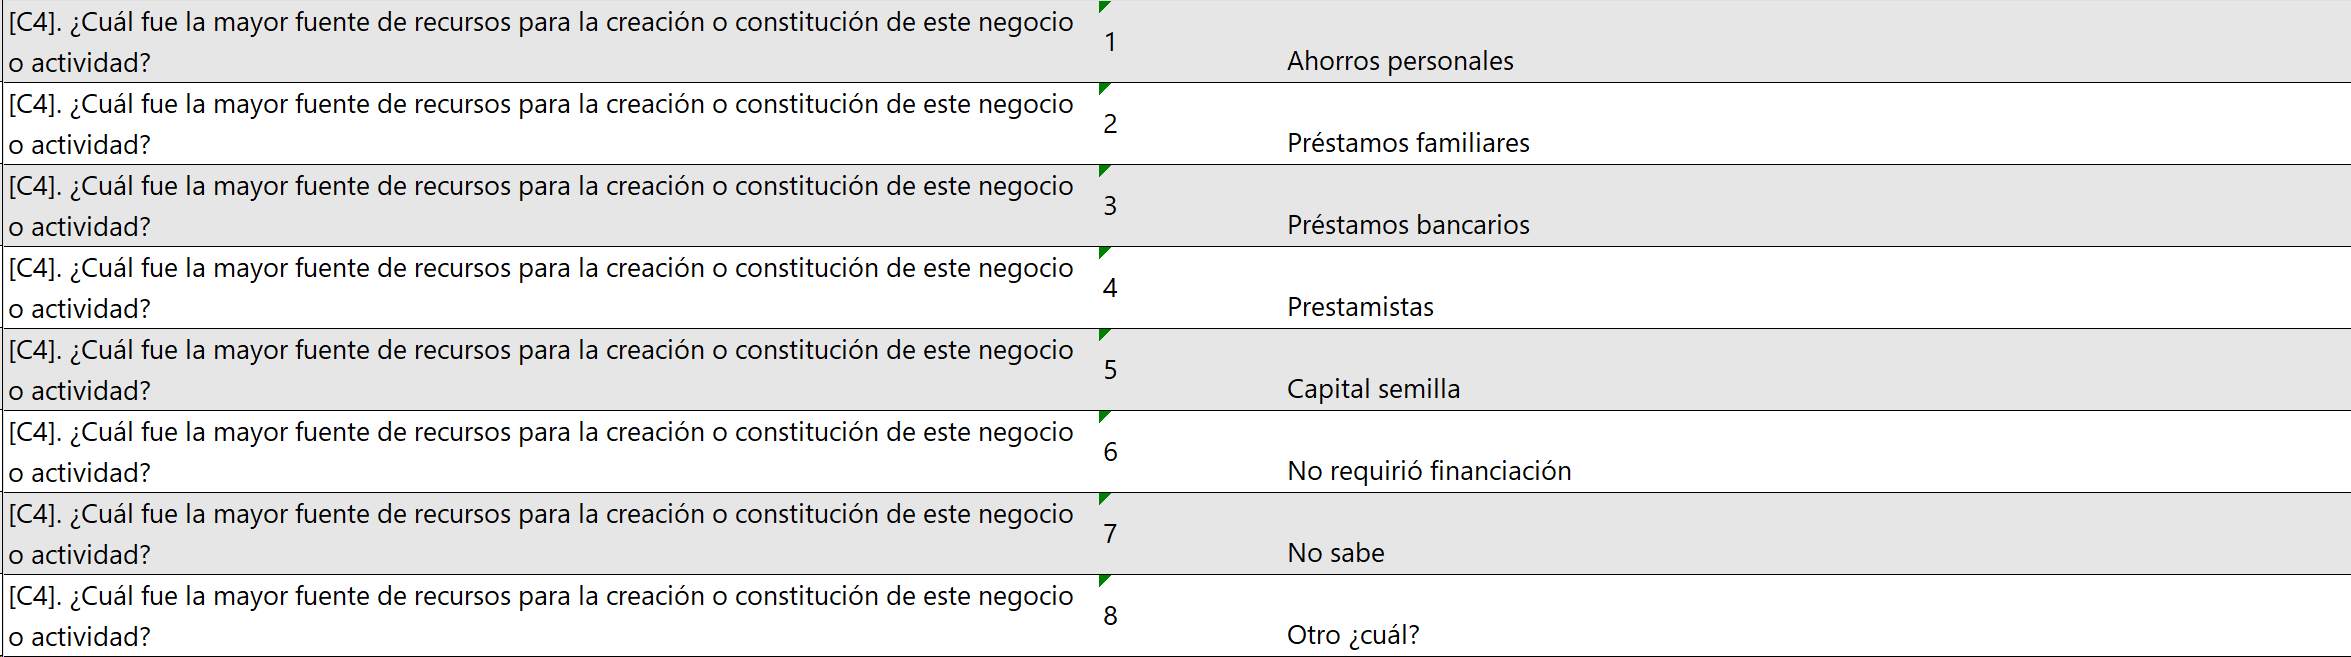

finance is 1 if formal and 0 if informal

In [142]:
emicron_nan = {}

In [143]:
modulo_emprendimiento = pd.read_csv("../../../Data/Emicron-2022/Módulo de emprendimiento.csv")

In [144]:
emicron_nan = pd.merge(emicron, modulo_emprendimiento, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [146]:
# Group by the values in P3052 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron_nan.groupby(['P3052', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3052', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by=['Cluster', 'Weighted Distribution']))

     P3052  Cluster  Weighted Distribution
28 5.00000        0                0.00001
48 8.00000        0                0.00027
21 4.00000        0                0.00031
7  2.00000        0                0.00128
14 3.00000        0                0.00167
35 6.00000        0                0.00282
0  1.00000        0                0.00965
42 7.00000        1                0.00024
29 5.00000        1                0.00029
49 8.00000        1                0.00203
22 4.00000        1                0.00710
15 3.00000        1                0.01492
8  2.00000        1                0.02201
36 6.00000        1                0.04721
1  1.00000        1                0.13081
43 7.00000        2                0.00000
50 8.00000        2                0.00015
30 5.00000        2                0.00023
23 4.00000        2                0.00029
37 6.00000        2                0.00099
9  2.00000        2                0.00331
16 3.00000        2                0.00784
2  1.00000 

*P994*

They don't need them
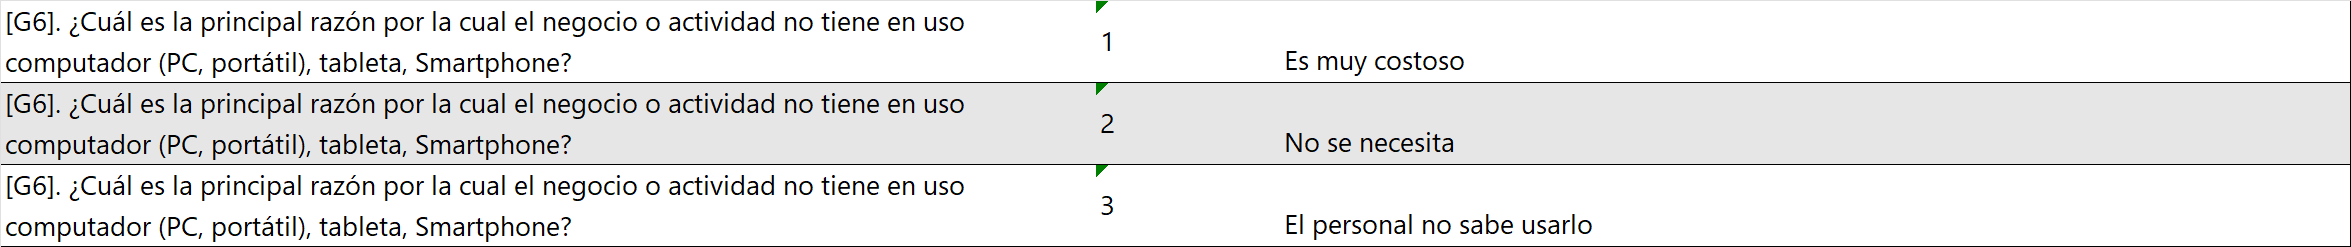

1 means they don't need it

In [150]:
emicron_nan = {}

In [151]:
modulo_TIC = pd.read_csv("../../../Data/Emicron-2022/Módulo de TIC.csv")

In [152]:
emicron_nan = pd.merge(emicron, modulo_TIC, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [153]:
emicron_nan['why_not_tech'] = emicron_nan['P994'].isin([2]).astype(int)

In [154]:
# Group by the cluster column and calculate the weighted average of why_not_tech within each cluster
weighted_avg_by_cluster = emicron_nan.groupby('cluster').apply(
    lambda x: (x['why_not_tech'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of why_not_tech']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of why_not_tech
0        0                           0.18197
1        1                           0.26426
2        2                           0.01854
3        3                           0.07542
4        4                           0.49344
5        5                           0.54158
6        6                           0.28675


In [155]:
# Group by the values in P994 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron_nan.groupby(['P994', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P994', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by=['Cluster', 'Weighted Distribution']))

      P994  Cluster  Weighted Distribution
0  1.00000        0                0.00014
6  2.00000        0                0.00865
13 3.00000        1                0.00263
1  1.00000        1                0.00662
7  2.00000        1                0.17184
8  2.00000        2                0.00161
2  1.00000        3                0.00037
14 3.00000        3                0.00154
9  2.00000        3                0.03666
15 3.00000        4                0.00245
3  1.00000        4                0.00630
10 2.00000        4                0.17434
4  1.00000        5                0.00990
16 3.00000        5                0.01953
11 2.00000        5                0.36556
17 3.00000        6                0.00341
5  1.00000        6                0.00368
12 2.00000        6                0.18475


*P1093: do you use internet?*

In [90]:
emicron_nan = {}

In [91]:
emicron_nan = pd.merge(emicron, modulo_TIC, on=['DIRECTORIO', 'SECUENCIA_ENCUESTA', 'SECUENCIA_P', 'CLASE_TE', 'COD_DEPTO', 'F_EXP'], how='inner')

In [93]:
# Group by the cluster column and calculate the weighted average of P1093 within each cluster
weighted_avg_by_cluster = emicron_nan.groupby('cluster').apply(
    lambda x: (x['P1093'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of P1093']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of P1093
0        0                   0.648288
1        1                   0.410602
2        2                   0.886801
3        3                   0.761794
4        4                   0.235603
5        5                   0.089790
6        6                   0.518298


In [96]:
# Group by the values in P1093 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron_nan.groupby(['P1093', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P1093', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df.sort_values(by='Cluster'))

    P1093  Cluster  Weighted Distribution
0     1.0        0               0.025006
7     2.0        0               0.000430
1     1.0        1               0.210329
8     2.0        1               0.006831
2     1.0        2               0.063565
9     2.0        2               0.000564
3     1.0        3               0.299828
10    2.0        3               0.005417
4     1.0        4               0.064177
11    2.0        4               0.002828
5     1.0        5               0.045034
12    2.0        5               0.002905
6     1.0        6               0.266035
13    2.0        6               0.007051


*P3042 edu level*
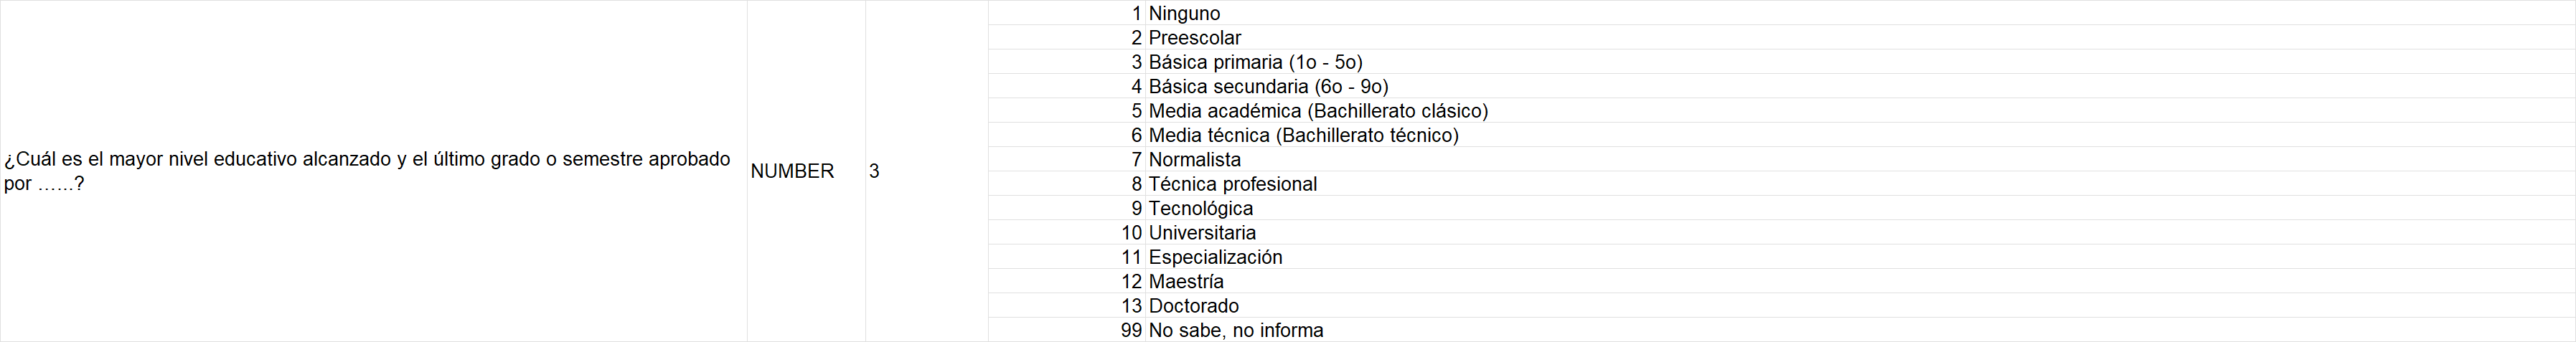

In [97]:
emicron_nan = {}

In [98]:
modulo_individual_geih = pd.read_stata("../../../Outputs/02_household-surveys/individual_geih-2022-clean.dta")

C:\Users\angel\AppData\Local\Temp\ipykernel_14196\1927362092.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  modulo_individual_geih = pd.read_stata("../../../Outputs/02_household-surveys/individual_geih-2022-clean.dta")


In [99]:
# Define the old and new column names
rename_cols = {'MES': 'MES_REF', 'CLASE': 'CLASE_TE', 'DPTO': 'COD_DEPTO', 'ORDEN':'SECUENCIA_ENCUESTA'}

# Rename the columns in all dataframes
modulo_individual_geih = modulo_individual_geih.rename(columns=rename_cols)

In [100]:
columns_to_drop = ['PERIODO', 'PER', 'REGIS', 'CLASE_TE', 'COD_DEPTO', 'MES_REF', 'id_house', 'FEX_C18', 'HOGAR', 'adj_weight', 'P3091', 'P3089', 'P3095', 'P3096', 'P3098', 'P3099', 'P3093']

modulo_individual_geih = modulo_individual_geih.drop(columns_to_drop, axis=1, errors='ignore')

In [101]:
modulo_individual_geih["DIRECTORIO"] = modulo_individual_geih["DIRECTORIO"].astype('int64')
modulo_individual_geih["SECUENCIA_P"] = modulo_individual_geih["SECUENCIA_P"].astype('int64')
modulo_individual_geih["SECUENCIA_ENCUESTA"] = modulo_individual_geih["SECUENCIA_ENCUESTA"].astype('int64')

In [102]:
# Define the columns you want to merge
merge_cols = ["DIRECTORIO", "SECUENCIA_P", 'SECUENCIA_ENCUESTA']

# Merge the first dataset
emicron_merge = pd.merge(emicron, modulo_individual_geih, on=merge_cols, how='inner')

In [129]:
# Group by the values in P3042 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron_merge.groupby(['P3042', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3042', 'Cluster', 'Weighted Distribution']

pd.set_option('display.max_rows', None)

# Print the table
weighted_distribution_df.sort_values(by='Cluster')

,P3042,Cluster,Weighted Distribution
0,1.0,0,0.000050
45,8.0,0,0.001705
39,7.0,0,0.000063
59,10.0,0,0.003690
32,6.0,0,0.000625
66,11.0,0,0.001466
18,4.0,0,0.001105
73,12.0,0,0.000693
11,3.0,0,0.001518
25,5.0,0,0.003968


In [105]:
emicron_merge['edu_level_high_school'] = ((emicron_merge['P3042'] >= 5) & (emicron_merge['P3042'] != 99)).astype(int)

In [106]:
# Group by the cluster column and calculate the weighted average of edu_level_high_school within each cluster
weighted_avg_by_cluster = emicron_merge.groupby('cluster').apply(
    lambda x: (x['edu_level_high_school'] * x['F_EXP']).sum() / x['F_EXP'].sum()
).reset_index()

# Rename the columns for better readability
weighted_avg_by_cluster.columns = ['Cluster', 'Weighted Average of edu_level_high_school']

# Print the table
print(weighted_avg_by_cluster)

   Cluster  Weighted Average of edu_level_high_school
0        0                                   0.834522
1        1                                   0.537344
2        2                                   0.841446
3        3                                   0.768914
4        4                                   0.287476
5        5                                   0.181097
6        6                                   0.638886


*P3043: edu degree*
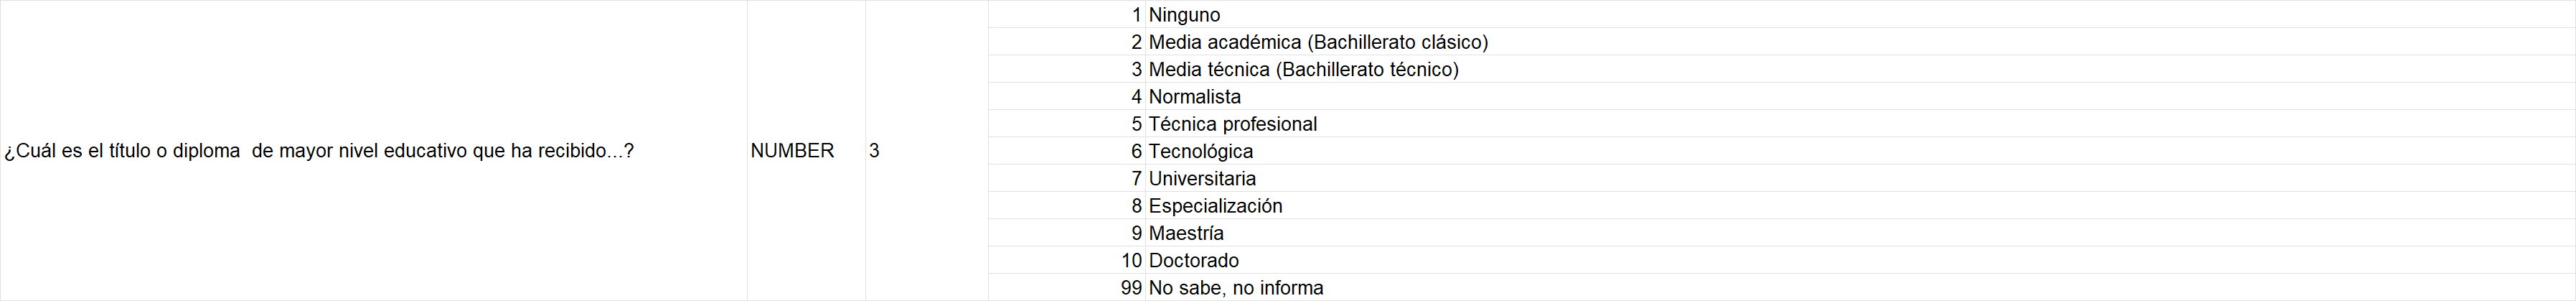

In [108]:
# Group by the values in P3043 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron_merge.groupby(['P3043', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3043', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

    P3043  Cluster  Weighted Distribution
0     1.0        0               0.000225
1     1.0        1               0.008327
2     1.0        2               0.000085
3     1.0        3               0.002462
4     1.0        4               0.008234
..    ...      ...                    ...
61   10.0        0               0.000213
62   10.0        1               0.000011
63   10.0        2               0.000206
64   10.0        3               0.000141
65   10.0        6               0.000007

[66 rows x 3 columns]


*P3039: gender*
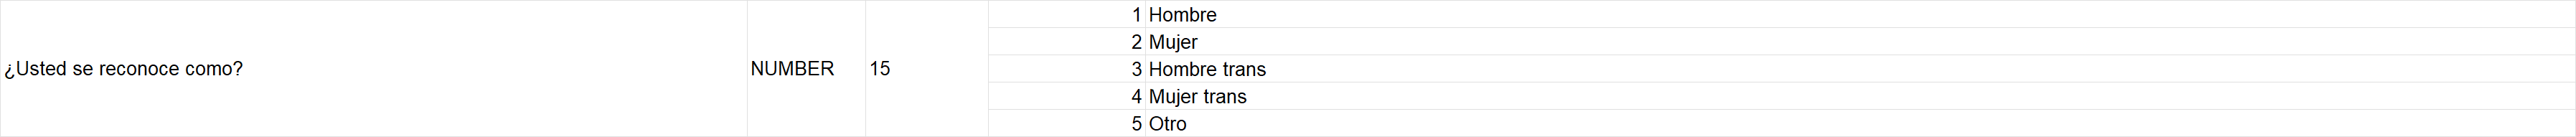

In [110]:
# Group by the values in P3039 and cluster, and calculate the weighted sum for each group
weighted_distribution = emicron_merge.groupby(['P3039', 'cluster'])['F_EXP'].sum()

# Normalize the weights to get the distribution
weighted_distribution /= weighted_distribution.sum()

# Convert to a DataFrame for better readability
weighted_distribution_df = weighted_distribution.reset_index()
weighted_distribution_df.columns = ['P3039', 'Cluster', 'Weighted Distribution']

# Print the table
print(weighted_distribution_df)

    P3039  Cluster  Weighted Distribution
0     1.0        0               0.009823
1     1.0        1               0.215822
2     1.0        2               0.022725
3     1.0        3               0.107568
4     1.0        4               0.080052
5     1.0        5               0.193715
6     1.0        6               0.025768
7     2.0        0               0.006315
8     2.0        1               0.004935
9     2.0        2               0.006819
10    2.0        3               0.057386
11    2.0        4               0.039956
12    2.0        5               0.035517
13    2.0        6               0.192585
14    3.0        0               0.000011
15    3.0        1               0.000149
16    3.0        3               0.000087
17    3.0        4               0.000004
18    3.0        5               0.000047
19    3.0        6               0.000300
20    4.0        1               0.000005
21    4.0        3               0.000026
22    4.0        4               0

*type of sales*
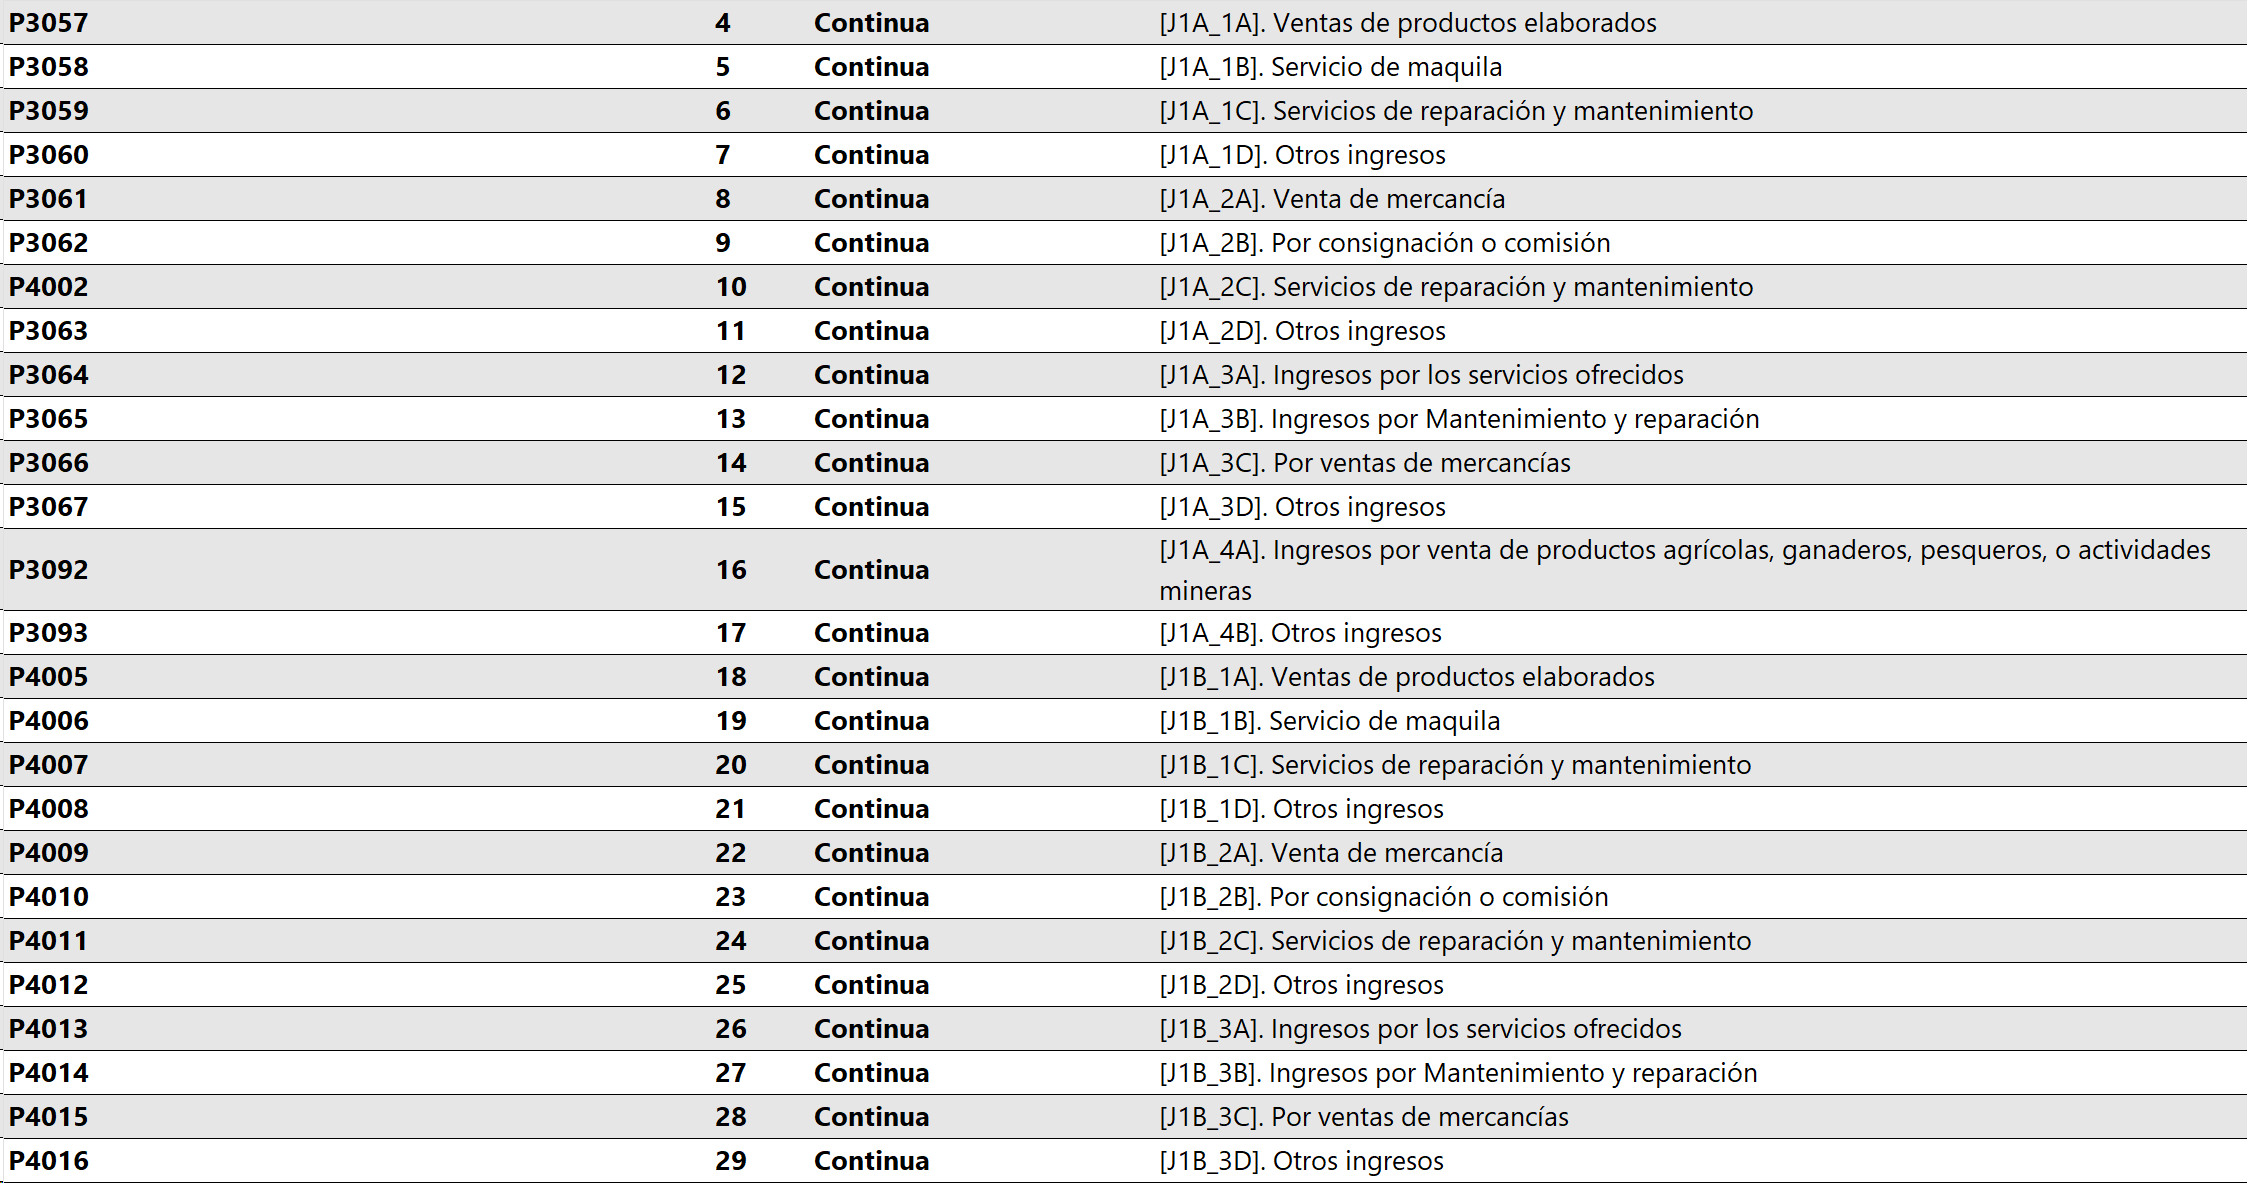

In [111]:
modulo_sales = pd.read_csv("../../../Data/Emicron-2022/Módulo de ventas o ingresos.csv")

In [135]:
emicron_nan = {}

In [136]:
emicron_nan = pd.merge(emicron, modulo_sales, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [137]:
columns = ['P3057', 'P3058', 'P3059', 'P3060', 'P3061', 'P3062', 'P3063', 'P3064', 'P3065', 'P3066', 'P3067', 'P3092', 'P3093', 'P4005', 'P4006', 'P4007', 'P4008', 'P4009', 'P4010', 'P4011', 'P4012', 'P4013', 'P4014', 'P4015', 'P4016']

weighted_averages_by_cluster = {}

for column in columns:
    weighted_averages_by_cluster[column] = emicron_nan.groupby('cluster').apply(
        lambda x: (x[column] * x['F_EXP']).sum() / x['F_EXP'].sum()
    ).to_dict()

# Convert the dictionary to a more readable format
weighted_averages_by_cluster_df = pd.DataFrame(weighted_averages_by_cluster).reset_index()
weighted_averages_by_cluster_df.columns = ['Cluster'] + columns

# Sort the weighted averages for each column within each cluster
sorted_weighted_averages_by_cluster = {
    cluster: sorted(weighted_averages.items(), key=lambda x: x[1], reverse=True)
    for cluster, weighted_averages in weighted_averages_by_cluster_df.set_index('Cluster').to_dict(orient='index').items()
}

sorted_weighted_averages_by_cluster

{0: [('P3064', 1019680.2745529913),
  ('P4013', 974619.1152474177),
  ('P3061', 530920.5236310065),
  ('P4009', 371592.3333410785),
  ('P3092', 182363.44998659866),
  ('P3057', 78419.49613481863),
  ('P4005', 69468.06070278643),
  ('P3066', 34410.043685270786),
  ('P4015', 12895.85984310513),
  ('P4010', 8161.3080906607),
  ('P3062', 4233.500697109225),
  ('P4016', 4104.090733193501),
  ('P3067', 3472.7608698196314),
  ('P3093', 2457.84017764697),
  ('P3058', 2379.040484373675),
  ('P4006', 2379.040484373675),
  ('P3059', 2061.516751297609),
  ('P4007', 1986.2364193794638),
  ('P3065', 1431.805706608282),
  ('P4014', 1350.7300692782521),
  ('P3060', 1050.384413988719),
  ('P4008', 445.4187509875375),
  ('P3063', 181.44564233584694),
  ('P4012', 11.985557339368),
  ('P4011', 0.0)],
 1: [('P3064', 1143547.2809159553),
  ('P4013', 954279.9340605885),
  ('P3061', 714675.3108646866),
  ('P4009', 607731.1012667726),
  ('P3057', 136218.1735917627),
  ('P4005', 113598.79724861978),
  ('P3092',

*MPI*

In [116]:
columns_mpi = ['mpi_index',
               'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
               'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
               'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
               'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
               'mpi_health_ss']

# Calculate the weighted average for each column grouped by cluster
weighted_avg_by_cluster = emicron.groupby('cluster').apply(
    lambda x: x[columns_mpi].multiply(x['F_EXP'], axis=0).sum() / x['F_EXP'].sum()
).reset_index()

# Print the weighted average values for each cluster
print(weighted_avg_by_cluster)

   cluster  mpi_index  mpi_poor  mpi_water  mpi_excrete  mpi_floor  mpi_walls  \
0        0   0.114022  0.025522   0.089352     0.073853   0.020767   0.004455   
1        1   0.183940  0.000862   0.048536     0.078870   0.011886   0.007540   
2        2   0.089038  0.016515   0.025302     0.018291   0.000242   0.000000   
3        3   0.139539  0.039060   0.028924     0.020044   0.002639   0.002314   
4        4   0.418296  0.920360   0.333615     0.445042   0.296568   0.125103   
5        5   0.280369  0.309129   0.336061     0.307433   0.202290   0.019933   
6        6   0.176839  0.019423   0.068761     0.082343   0.022172   0.009232   

   mpi_overcrowding  mpi_housing  mpi_eco_dep  mpi_inf_work  mpi_labour  \
0          0.051859     0.048057     0.111935      0.535209    0.323572   
1          0.065060     0.042378     0.189790      0.941070    0.565430   
2          0.014265     0.011620     0.148488      0.466768    0.307628   
3          0.032811     0.017346     0.149319      

*plotting II and mpi*

In [117]:
emicron['mpi_index_rev'] = 1-emicron['mpi_index']

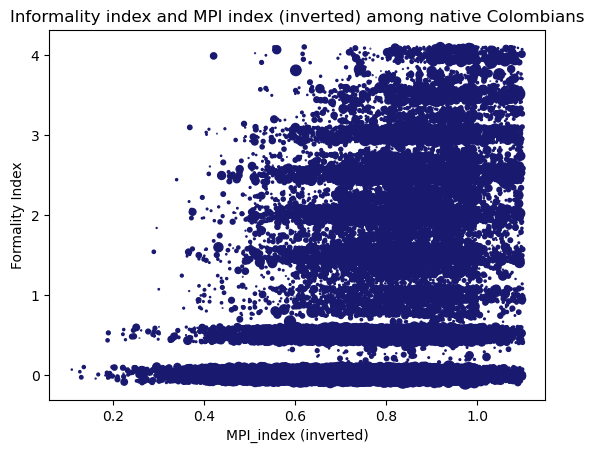

In [118]:
import numpy as np

# Add more random noise to create more dispersion
jitter = 0.1 # adjust this value to change the amount of jitter
emicron['mpi_index_rev_jittered'] = emicron['mpi_index_rev'] + np.random.uniform(-jitter, jitter, size=len(emicron))
emicron['II_jittered'] = emicron['II'] + np.random.uniform(-jitter, jitter, size=len(emicron))

# Normalize 'F_EXP' for better visualization
size_0 = (emicron['F_EXP'] - emicron['F_EXP'].min()) / (emicron['F_EXP'].max() - emicron['F_EXP'].min()) * 100

# Use matplotlib to create the scatter plot
plt.scatter(emicron['mpi_index_rev_jittered'], emicron['II_jittered'],
            edgecolors='#191970', facecolors='#191970', s=size_0)

plt.title('Informality index and MPI index (inverted) among native Colombians')
plt.xlabel('MPI_index (inverted)')
plt.ylabel('Formality Index')
plt.show()

*financial inclusion*

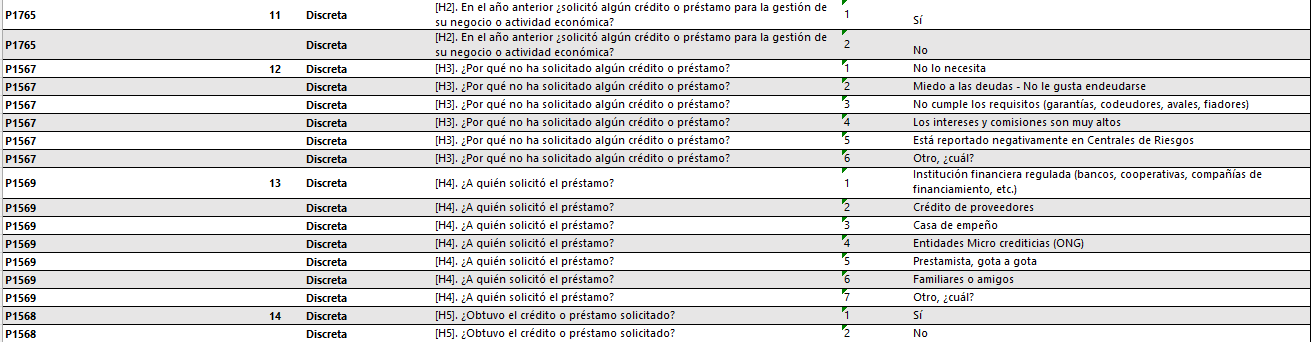

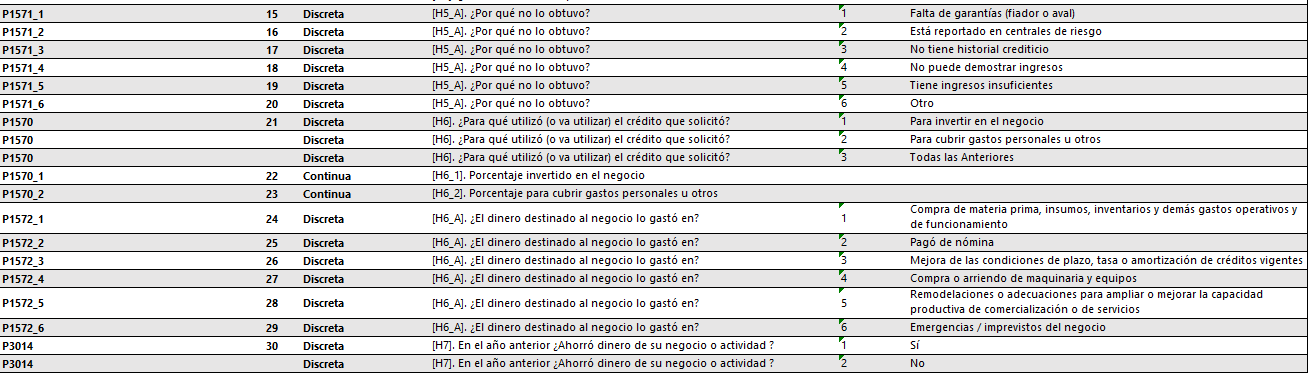

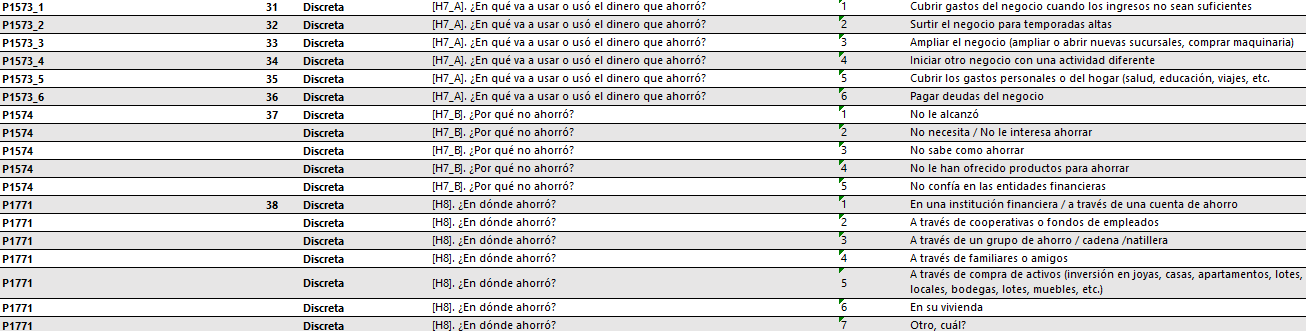

In [119]:
modulo_fin = pd.read_csv("../../../Data/Emicron-2022/Módulo de inclusión financiera.csv")

In [120]:
emicron_nan = {}

In [121]:
emicron_nan = pd.merge(emicron, modulo_fin, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", "CLASE_TE", "COD_DEPTO", "F_EXP"], how='left')

In [122]:
columns = ['P1765', 'P1567', 'P1569', 'P1568', 'P1571_1', 'P1571_2', 'P1571_3', 'P1571_4', 'P1571_5', 'P1571_6', 'P1570', 'P1572_1', 'P1572_2', 'P1572_3', 'P1572_4', 'P1572_5', 'P1572_6', 'P3014', 'P1573_1', 'P1573_2', 'P1573_3', 'P1573_4', 'P1573_5', 'P1573_6', 'P1574', 'P1771']

clusters = emicron_nan['cluster'].unique()

for cluster in clusters:
    cluster_data = emicron_nan[emicron_nan['cluster'] == cluster]
    print(f"Cluster: {cluster}")
    
    for column in columns:
        # Group by the values in the column and calculate the weighted sum for each group within the cluster
        weighted_distribution = cluster_data.groupby(column)['F_EXP'].sum()
        
        # Normalize the weights to get the distribution
        weighted_distribution /= weighted_distribution.sum()
        
        # Convert to a DataFrame for better readability
        weighted_distribution_df = weighted_distribution.reset_index()
        weighted_distribution_df.columns = [column, 'Weighted Distribution']
        
        # Print the table
        print(f"Weighted distribution for {column} in cluster {cluster}:")
        print(weighted_distribution_df)
        print("\n")

Cluster: 6
Weighted distribution for P1765 in cluster 6:
   P1765  Weighted Distribution
0    1.0               0.173336
1    2.0               0.826664


Weighted distribution for P1567 in cluster 6:
   P1567  Weighted Distribution
0    1.0               0.217835
1    2.0               0.499870
2    3.0               0.177062
3    4.0               0.044604
4    5.0               0.039927
5    6.0               0.020701


Weighted distribution for P1569 in cluster 6:
   P1569  Weighted Distribution
0    1.0               0.421904
1    2.0               0.030351
2    3.0               0.004239
3    4.0               0.023235
4    5.0               0.283913
5    6.0               0.233003
6    7.0               0.003356


Weighted distribution for P1568 in cluster 6:
   P1568  Weighted Distribution
0    1.0               0.923384
1    2.0               0.076616


Weighted distribution for P1571_1 in cluster 6:
   P1571_1  Weighted Distribution
0      1.0                    1.0


Weighte

In [123]:
columns = ['P1571_1', 'P1571_2', 'P1571_3', 'P1571_4', 'P1571_5', 'P1571_6', 
           'P1572_1', 'P1572_2', 'P1572_3', 'P1572_4', 'P1572_5', 'P1572_6', 
           'P1573_1', 'P1573_2', 'P1573_3', 'P1573_4', 'P1573_5', 'P1573_6']

clusters = emicron_nan['cluster'].unique()

for cluster in clusters:
    cluster_data = emicron_nan[emicron_nan['cluster'] == cluster]
    
    # Calculate the weighted average for each column within the cluster
    weighted_avg = cluster_data[columns].multiply(cluster_data['F_EXP'], axis=0).sum() / cluster_data['F_EXP'].sum()
    
    # Print the weighted average values for the current cluster
    print(f"Weighted average values for the specified columns in cluster {cluster}:")
    print(weighted_avg)
    print("\n")

Weighted average values for the specified columns in cluster 6:
P1571_1    0.004210
P1571_2    0.003170
P1571_3    0.002794
P1571_4    0.001484
P1571_5    0.001109
P1571_6    0.000131
P1572_1    0.100725
P1572_2    0.000880
P1572_3    0.001986
P1572_4    0.012483
P1572_5    0.005394
P1572_6    0.009850
P1573_1    0.051150
P1573_2    0.016763
P1573_3    0.004688
P1573_4    0.002580
P1573_5    0.092866
P1573_6    0.015863
dtype: float64


Weighted average values for the specified columns in cluster 1:
P1571_1    0.003428
P1571_2    0.003290
P1571_3    0.002036
P1571_4    0.001682
P1571_5    0.000776
P1571_6    0.000995
P1572_1    0.071825
P1572_2    0.000483
P1572_3    0.002354
P1572_4    0.016446
P1572_5    0.006012
P1572_6    0.013249
P1573_1    0.040718
P1573_2    0.007914
P1573_3    0.004804
P1573_4    0.001763
P1573_5    0.092698
P1573_6    0.015264
dtype: float64


Weighted average values for the specified columns in cluster 4:
P1571_1    0.002937
P1571_2    0.001965
P1571_3    0.0

**saving emicron_native**

In [124]:
emicron.to_csv('../../../Outputs/emicron_native_clusters.csv', index=False)